# Initial Import of Data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import beta
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [149]:
df = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv', sep=';')

In [150]:
df.head(50)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742.0,NaN,1.0446,15.2935,14.6404,116,07/01/2015,06/30/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279.0,NaN,1.2361,14.5943,11.8065,46,07/01/2015,06/30/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495.0,NaN,1.0249,18.6162,18.1637,94,07/01/2015,06/30/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114.0,NaN,1.0453,22.3772,21.4082,252,07/01/2015,06/30/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301.0,NaN,1.1787,5.5863,4.7392,20,07/01/2015,06/30/2018
5,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,605.0,NaN,1.0049,16.8059,16.7237,102,07/01/2015,06/30/2018
6,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9255,14.1024,15.2379,Too Few to Report,07/01/2015,06/30/2018
7,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2015,06/30/2018
8,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-COPD-HRRP,636.0,NaN,0.9028,16.1179,17.8526,95,07/01/2015,06/30/2018
9,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-HF-HRRP,341.0,NaN,0.9911,20.3917,20.5744,69,07/01/2015,06/30/2018


In [151]:
df.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               19344 non-null  object 
 1   Facility ID                 19344 non-null  int64  
 2   State                       19344 non-null  object 
 3   Measure Name                19344 non-null  object 
 4   Number of Discharges        11440 non-null  float64
 5   Footnote                    5274 non-null   float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      14071 non-null  object 
 10  Start Date                  19344 non-null  object 
 11  End Date                    19344 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [153]:
df.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,19344.000000,11440.000000,5274.000000,14071.000000,14071.000000,14071.000000
mean,262195.596154,393.304808,3.635950,1.002507,15.383346,15.337661
std,162257.586241,363.203205,1.981472,0.089052,5.959672,5.778370
min,10001.000000,0.000000,1.000000,0.623000,2.199400,2.799700
25%,110110.500000,158.000000,1.000000,0.950850,13.285200,13.540200
50%,250089.000000,290.000000,5.000000,0.997800,16.712700,16.639300
75%,390117.500000,508.000000,5.000000,1.049400,19.559800,19.647700
max,670128.000000,9356.000000,23.000000,2.183200,30.257900,25.697100


# Data Cleaning

In [154]:
df['Number of Discharges'] = df['Number of Discharges'].fillna(0) #change NaN to 0

In [155]:
df['Number of Readmissions'] = df['Number of Readmissions'].fillna(0) #change NaN to 0

In [156]:
df['Number of Readmissions'] = df['Number of Readmissions'].apply(lambda x: 0 if x == 'Too Few to Report' else x)

In [157]:

df['Number of Readmissions'] = df['Number of Readmissions'].astype(int)

In [158]:
df['Number of Discharges'] = df['Number of Discharges'].astype(int)

In [159]:
df['Readmission Rate'] = df['Number of Readmissions'] / df['Number of Discharges']

In [160]:
df.head(5)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmission Rate
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742,NaN,1.0446,15.2935,14.6404,116,07/01/2015,06/30/2018,0.156334
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279,NaN,1.2361,14.5943,11.8065,46,07/01/2015,06/30/2018,0.164875
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495,NaN,1.0249,18.6162,18.1637,94,07/01/2015,06/30/2018,0.189899
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114,NaN,1.0453,22.3772,21.4082,252,07/01/2015,06/30/2018,0.226212
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301,NaN,1.1787,5.5863,4.7392,20,07/01/2015,06/30/2018,0.066445


# Hypothesis Testing

In [161]:
grouped_by_state = df.groupby(['State']).sum()

In [162]:
grouped_by_state.head(5)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmission Rate
State,,,,,,,,
AK,960672,4884,44.0,36.4421,522.5422,541.4157,681,3.441625
AL,4899078,88235,570.0,328.5386,5043.5981,4980.0792,14128,42.740238
AR,11057514,62604,291.0,199.2318,2936.2502,2868.1222,9894,27.993832
AZ,11008212,80832,420.0,256.9807,3695.5661,3782.8751,10390,30.128955
CA,89164008,316731,1623.0,1221.1025,19582.7671,19382.6728,51765,171.311871


In [163]:
df_test = grouped_by_state.reset_index()
#df_test.head()

In [164]:
coastal = ['WA', 'CA', 'OR', 'TX', 'LA', 'FL', 'GA', 'SC', 'NC', 'VA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NH', 'ME']

In [165]:
coastal_df = df_test.loc[df_test['State'].isin(coastal), :] #variation A

In [166]:
non_coastal_df = df_test.loc[~df_test['State'].isin(coastal), :] #Variation B

In [167]:
#coastal_df.head(20)

In [168]:
#non_coastal_df.head(35)

In [169]:
prior_a = 1
prior_b = 1

In [170]:
#P(Var|n; c) = f(x; a + c; b + (n - c)) -> This is the posterior equation

In [171]:
varA_c = coastal_df['Number of Readmissions'].sum() 

In [172]:
varA_n= coastal_df['Number of Discharges'].sum()

In [173]:
varB_c = non_coastal_df['Number of Readmissions'].sum()

In [174]:
varB_n = non_coastal_df['Number of Discharges'].sum()

In [175]:
#posterior parameters

In [176]:
varA_posteriora = prior_a + varA_c

In [177]:
varB_posteriora = prior_a + varB_c

In [178]:
varA_posteriorb = prior_b + (varA_n - varA_c)

In [179]:
varB_posteriorb = prior_b + (varB_n - varB_c)

In [180]:
#posterior probabilty distribution function

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

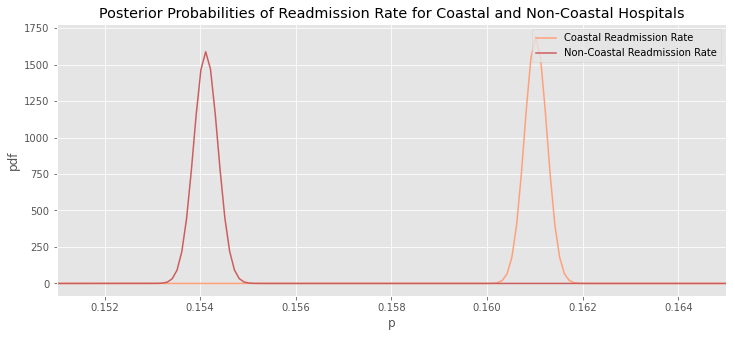

In [181]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora+1, varA_posteriorb+1, "lightsalmon", "Coastal Readmission Rate"),
                      (varB_posteriora+1, varB_posteriorb+1, "indianred", "Non-Coastal Readmission Rate")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.151, .165)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [182]:
#posterior PDF

In [183]:
#rvs_varA = stats.beta(varA_posteriora,varA_posteriorb).rvs(1000000000)

In [184]:
#rvs_varB = stats.beta(varB_posteriora,varB_posteriorb).rvs(1000000000)

In [185]:
#x = rvs_varA < rvs_varB
        

In [186]:
#np.mean(x)

In [187]:
#joint posterior

In [201]:
varA_posterior = beta.pdf(x, varA_posteriora, varA_posteriorb)
varB_posterior = beta.pdf(x, varB_posteriora, varB_posteriorb)
joint_posterior = np.zeros(shape = (100,100))

for i in range(100):
    for j in range(100):
        joint_posterior[i][j] = varA_posterior[i] * varB_posterior[j]

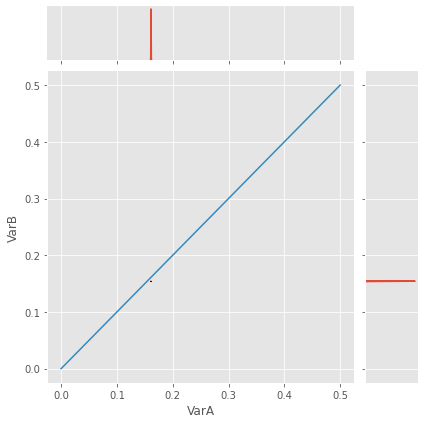

In [206]:
val_varA = np.random.beta(varA_posteriora, varA_posteriorb, 10000)
val_varB = np.random.beta(varB_posteriora, varB_posteriorb, 10000)


vals_both_var = np.vstack([val_varA, val_varB]).T

df_a = pd.DataFrame(vals_both_var, columns=['VarA', 'VarB'])
g = sns.jointplot(x = df_a.VarA, y=df_a.VarB, kind='kde', n_levels=15)
g.ax_joint.plot([0, 0.5], [0, 0.5])
plt.show()


In [42]:
#joint posterior

In [43]:
#plot posterior

In [44]:
#percent better

In [45]:
#loss

In [46]:
grouped_by_state_and_measure = df.groupby(['State', 'Measure Name']).sum()

In [53]:
df_test2 = grouped_by_state_and_measure.reset_index()

In [64]:
coastal_nomeasure_df = df_test2.loc[df_test2['State'].isin(coastal), :]
noncoastal_nomeasure_df = df_test2.loc[~df_test2['State'].isin(coastal), :]
coastal_AMI_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-AMI-HRRP', :]
noncoastal_AMI_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-AMI-HRRP', :]

In [66]:
varA_c_AMI = coastal_AMI_df['Number of Readmissions'].sum() 
varA_n_AMI = coastal_AMI_df['Number of Discharges'].sum()
varB_c_AMI = noncoastal_AMI_df['Number of Readmissions'].sum()
varB_n_AMI = noncoastal_AMI_df['Number of Discharges'].sum()

varA_posteriora_AMI = prior_a + varA_c_AMI
varB_posteriora_AMI = prior_a + varB_c_AMI
varA_posteriorb_AMI = prior_b + (varA_n_AMI - varA_c_AMI)
varB_posteriorb_AMI = prior_b + (varB_n_AMI - varB_c_AMI)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

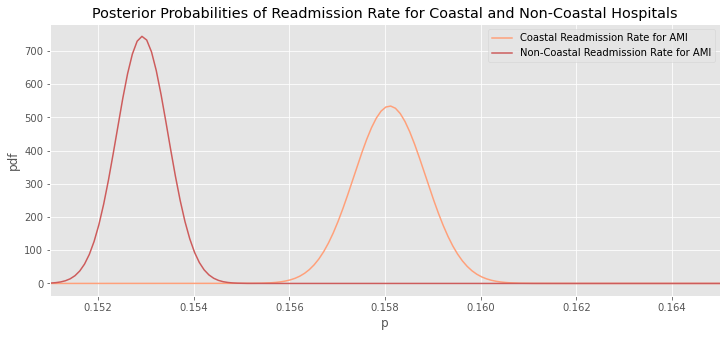

In [67]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_AMI+1, varA_posteriorb_AMI+1, "lightsalmon", "Coastal Readmission Rate for AMI"),
                      (varB_posteriora_AMI+1, varB_posteriorb_AMI+1, "indianred", "Non-Coastal Readmission Rate for AMI")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.151, .165)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [87]:
coastal_COPD_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-COPD-HRRP', :]
noncoastal_COPD_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-COPD-HRRP', :]

In [88]:
varA_c_COPD = coastal_COPD_df['Number of Readmissions'].sum() 
varA_n_COPD = coastal_COPD_df['Number of Discharges'].sum()
varB_c_COPD = noncoastal_COPD_df['Number of Readmissions'].sum()
varB_n_COPD = noncoastal_COPD_df['Number of Discharges'].sum()

varA_posteriora_COPD = prior_a + varA_c_COPD
varB_posteriora_COPD = prior_a + varB_c_COPD
varA_posteriorb_COPD = prior_b + (varA_n_COPD - varA_c_COPD)
varB_posteriorb_COPD = prior_b + (varB_n_COPD - varB_c_COPD)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

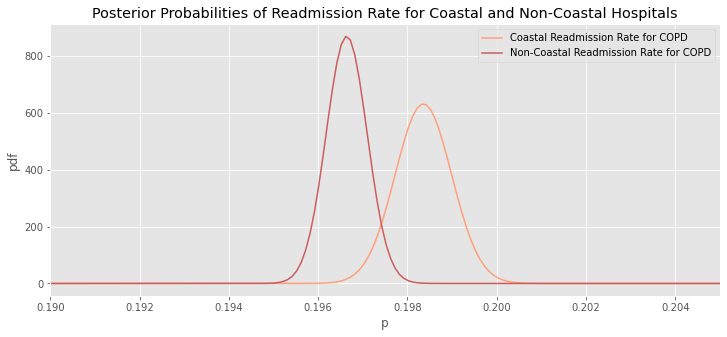

In [101]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_COPD+1, varA_posteriorb_COPD+1, "lightsalmon", "Coastal Readmission Rate for COPD"),
                      (varB_posteriora_COPD+1, varB_posteriorb_COPD+1, "indianred", "Non-Coastal Readmission Rate for COPD")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.19, 0.205)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [102]:
coastal_CABG_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-CABG-HRRP', :]
noncoastal_CABG_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-CABG-HRRP', :]

In [112]:
varA_c_CABG = coastal_CABG_df['Number of Readmissions'].sum() 
varA_n_CABG = coastal_CABG_df['Number of Discharges'].sum()
varB_c_CABG = noncoastal_CABG_df['Number of Readmissions'].sum()
varB_n_CABG = noncoastal_CABG_df['Number of Discharges'].sum()

varA_posteriora_CABG = prior_a + varA_c_CABG
varB_posteriora_CABG = prior_a + varB_c_CABG
varA_posteriorb_CABG = prior_b + (varA_n_CABG - varA_c_CABG)
varB_posteriorb_CABG = prior_b + (varB_n_CABG - varB_c_CABG)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

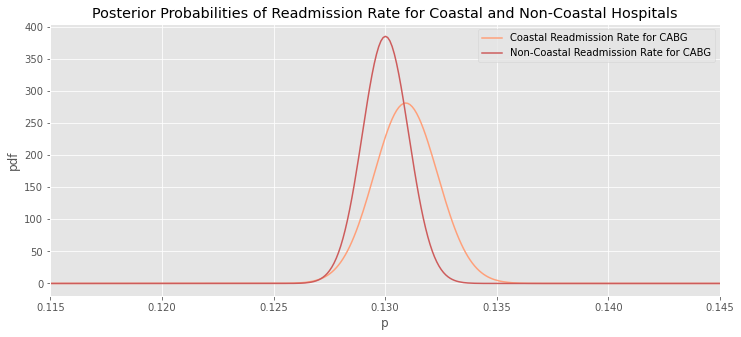

In [118]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_CABG+1, varA_posteriorb_CABG+1, "lightsalmon", "Coastal Readmission Rate for CABG"),
                      (varB_posteriora_CABG+1, varB_posteriorb_CABG+1, "indianred", "Non-Coastal Readmission Rate for CABG")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.115, 0.145)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [119]:
coastal_HF_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-HF-HRRP', :]
noncoastal_HF_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-HF-HRRP', :]

In [120]:
varA_c_HF = coastal_HF_df['Number of Readmissions'].sum() 
varA_n_HF = coastal_HF_df['Number of Discharges'].sum()
varB_c_HF = noncoastal_HF_df['Number of Readmissions'].sum()
varB_n_HF = noncoastal_HF_df['Number of Discharges'].sum()

varA_posteriora_HF = prior_a + varA_c_HF
varB_posteriora_HF = prior_a + varB_c_HF
varA_posteriorb_HF = prior_b + (varA_n_HF - varA_c_HF)
varB_posteriorb_HF = prior_b + (varB_n_HF - varB_c_HF)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

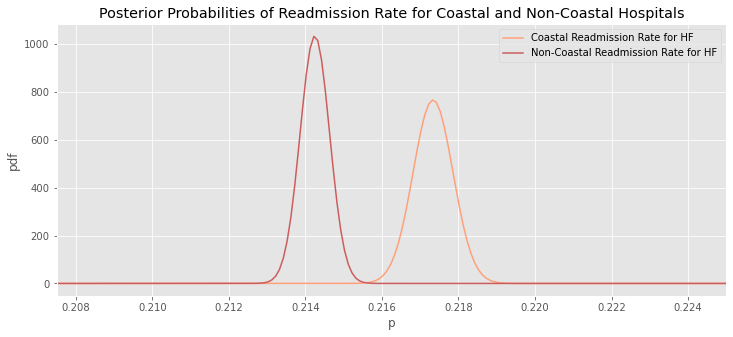

In [127]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_HF+1, varA_posteriorb_HF+1, "lightsalmon", "Coastal Readmission Rate for HF"),
                      (varB_posteriora_HF+1, varB_posteriorb_HF+1, "indianred", "Non-Coastal Readmission Rate for HF")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.2075, 0.225)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [129]:
coastal_HIP_KNEE_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-HIP-KNEE-HRRP', :]
noncoastal_HIP_KNEE_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-HIP-KNEE-HRRP', :]

In [130]:
varA_c_HIP_KNEE = coastal_HIP_KNEE_df['Number of Readmissions'].sum() 
varA_n_HIP_KNEE = coastal_HIP_KNEE_df['Number of Discharges'].sum()
varB_c_HIP_KNEE = noncoastal_HIP_KNEE_df['Number of Readmissions'].sum()
varB_n_HIP_KNEE = noncoastal_HIP_KNEE_df['Number of Discharges'].sum()

varA_posteriora_HIP_KNEE = prior_a + varA_c_HIP_KNEE
varB_posteriora_HIP_KNEE = prior_a + varB_c_HIP_KNEE
varA_posteriorb_HIP_KNEE = prior_b + (varA_n_HIP_KNEE - varA_c_HIP_KNEE)
varB_posteriorb_HIP_KNEE = prior_b + (varB_n_HIP_KNEE - varB_c_HIP_KNEE)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

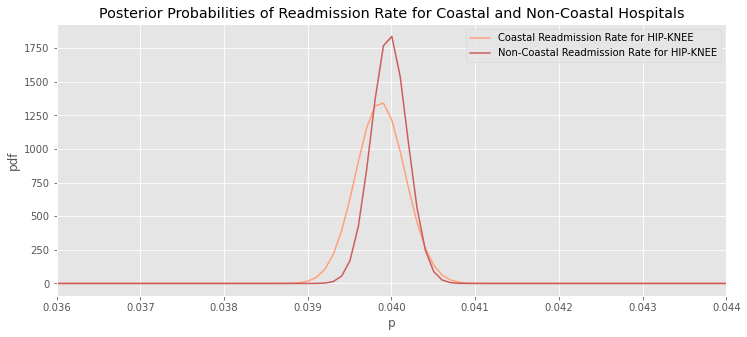

In [137]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_HIP_KNEE+1, varA_posteriorb_HIP_KNEE+1, "lightsalmon", "Coastal Readmission Rate for HIP-KNEE"),
                      (varB_posteriora_HIP_KNEE+1, varB_posteriorb_HIP_KNEE+1, "indianred", "Non-Coastal Readmission Rate for HIP-KNEE")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.036, 0.044)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

In [138]:
coastal_PN_df = coastal_nomeasure_df.loc[df_test2['Measure Name'] == 'READM-30-PN-HRRP', :]
noncoastal_PN_df = df_test2.loc[df_test2['Measure Name'] == 'READM-30-PN-HRRP', :]

In [139]:
varA_c_PN = coastal_PN_df['Number of Readmissions'].sum() 
varA_n_PN = coastal_PN_df['Number of Discharges'].sum()
varB_c_PN = noncoastal_PN_df['Number of Readmissions'].sum()
varB_n_PN = noncoastal_PN_df['Number of Discharges'].sum()

varA_posteriora_PN = prior_a + varA_c_PN
varB_posteriora_PN = prior_a + varB_c_PN
varA_posteriorb_PN = prior_b + (varA_n_PN - varA_c_PN)
varB_posteriorb_PN = prior_b + (varB_n_PN - varB_c_PN)

Text(0.5, 1.0, 'Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals')

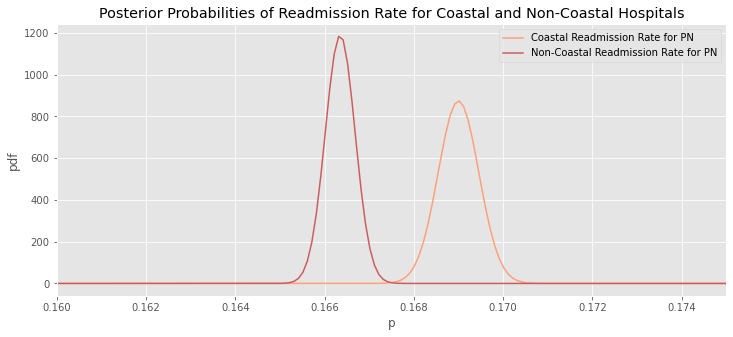

In [145]:
fig, ax = plt.subplots(figsize = (12,5))
x = np.linspace(0,1,10000)
for (a,b,s,label) in [(varA_posteriora_PN+1, varA_posteriorb_PN+1, "lightsalmon", "Coastal Readmission Rate for PN"),
                      (varB_posteriora_PN+1, varB_posteriorb_PN+1, "indianred", "Non-Coastal Readmission Rate for PN")]:
    ax.plot(x,
            stats.beta(a,b).pdf(x),
            s,
            label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0.16, 0.175)
ax.set_title("Posterior Probabilities of Readmission Rate for Coastal and Non-Coastal Hospitals")

# Visualizations

In [50]:
grouped_measure = df.groupby(['Measure Name']).sum()

In [51]:
grouped_measure.head(20)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmission Rate
Measure Name,,,,,,,,
READM-30-AMI-HRRP,845318602,451012,2553.0,2055.9831,32363.5230,32253.4216,68969,265.543623
READM-30-CABG-HRRP,845318602,105425,10563.0,995.1767,12719.4873,12682.3021,13706,80.704918
READM-30-COPD-HRRP,845318602,749287,1245.0,2823.3156,53748.3259,53662.3392,147338,489.551537
READM-30-HF-HRRP,845318602,1129905,1263.0,2848.4037,59993.6523,59824.8248,242078,568.679846
READM-30-HIP-KNEE-HRRP,845318602,832235,2495.0,2467.2966,10439.5935,10352.2775,33265,57.812966
READM-30-PN-HRRP,845318602,1231543,1057.0,2916.0987,47194.4743,47041.0630,204867,445.382142


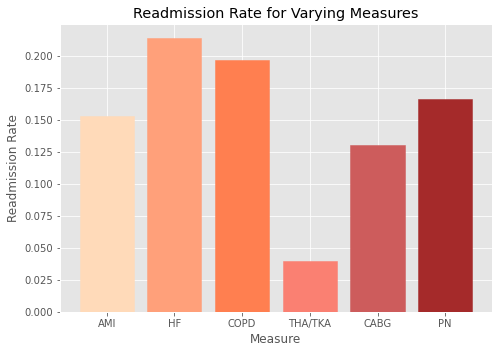

In [52]:
bars = ['AMI', 'HF', 'COPD', 'THA/TKA', 'CABG', 'PN']
readmission_rate = [(68969/451012), (242078/1129905), (147338/749287), (33265/832235), (13706/105425), (204867/1231543)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bars, readmission_rate)
ax.set_title('Readmission Rate for Varying Measures')
ax.set_xlabel('Measure')
ax.set_ylabel('Readmission Rate')
ax.get_children()[0].set_color('peachpuff')
ax.get_children()[1].set_color('lightsalmon')
ax.get_children()[2].set_color('coral')
ax.get_children()[3].set_color('salmon')
ax.get_children()[4].set_color('indianred')
ax.get_children()[5].set_color('brown')
plt.show()